The purpose of the file is to load all the Job Description and perform below activties on it.

<ol>
    <li>Clean text
        <ul>
            <li> Parse words
            <li> Remove all special characters
            <li> Cleaned formatting
        </ul>
    <li> Tokenize
         <ul>
             <li> Words
             <li> Sentences
        </ul>
    <li> Counts
         <ul>
             <li> Word Count w/ visualization
             <li> Sentence Count w/ visualization
        </ul>
    <li> Stop Word Removal 
    <li> Stemitization
    <li> Lemmatization
    <li> create one large corpus for analysis               
    

In [56]:
#Loading the Required Libraries
#Basic Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import re

#Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()

#ML and Core NLP Libraries
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
!pip install nltk --upgrade --quiet

# Required downloads for use with above models. This needs to be executed only once
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')

In [57]:
#Load the data file
df = pd.read_csv(r'data\collected_data\indeed_job_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5715 non-null   int64  
 1   Job_Title                         5715 non-null   object 
 2   Link                              5715 non-null   object 
 3   Queried_Salary                    5715 non-null   object 
 4   Job_Type                          5715 non-null   object 
 5   Skill                             5483 non-null   object 
 6   No_of_Skills                      5715 non-null   int64  
 7   Company                           5611 non-null   object 
 8   No_of_Reviews                     4753 non-null   float64
 9   No_of_Stars                       4753 non-null   float64
 10  Date_Since_Posted                 5611 non-null   float64
 11  Description                       5413 non-null   object 
 12  Locati

In [59]:
# scaling down the dataset as the description is all that is required
df_desc = df.Description
# random choice to get a sense of the data formatting and cell to check other indices
df_desc.iloc[677]

"[<ul>\r\r\n<li>2+ year experience as a data scientist in digital marketing, e-commerce or financial services, or MS/Phd degree in STEM with specialization in machine learning, statistical modeling and optimization</li>\r\r\n<li>Expert knowledge of machine learning, predictive modeling, statistics and data science in general. Knowledge and experience in marketing channel optimization, customer behavior/journey modeling and prediction, product recommendation systems, online testing and etc. is highly desired</li>\r\r\n<li>Proficiency in one or multiple data science programing languages such as R, Python and Spark</li>\r\r\n<li>Capability of communicating effectively with business and data science leaders on project status, timeline and technical results</li>\r\r\n<li>Proficient at collecting and mining data from disparate data sources, and willing to dig deeper and understand the process that creates the data</li>\r\r\n<li>Analytical and detail oriented with the ability to prioritize, e

In [6]:
#function for Data Cleaning
def clean_text(raw):
    '''Case specific to be used with pandas apply method'''
    try:
        # remove carriage returns and new lines
        raw = raw.replace('\r', '')
        raw = raw.replace('\n', '')
        
        # brackets appear in all instances
        raw = raw.replace('[', '')
        raw = raw.replace(']', '')
        raw = raw.replace(')', '')
        raw = raw.replace('(', '')
        
        # removing html tags
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html, ' ', raw)
        
        # removing duplicate whitespace in between words
        clean_text = re.sub(" +", " ", clean_text) 
        
        # stripping first and last white space 
        clean_text = clean_text.strip()
        
        # commas had multiple spaces before and after in each instance
        clean_text = re.sub(" , ", ", ", clean_text) 
        
        # eliminating the extra comma after a period
        clean_text = clean_text.replace('.,', '.')
        
        # using try and except due to Nan in the column
    except:
        clean_text = np.nan
        
    return clean_text

In [7]:
#Applying clean_text on the Job Description Column
df_desc = df_desc.apply(clean_text)
df_desc.iloc[876]

"Note: By applying to this position your application is automatically submitted to the following locations: Seattle, WA, USA; New York, NY, USA; Mountain View, CA, USA; Pittsburgh, PA, USA, Research in machine intelligence has already impacted user-facing services across Google including Search, Maps and Google Now. Google Research &amp; Machine Intelligence teams are actively pursuing the next generation of intelligent systems for application to even more Google products. To achieve this, we’re working on projects that utilize the latest techniques in Machine Learning including Deep Learning approaches like Google Brain and Natural Language Understanding. We’ve already been joined by some of the best minds, and we’re looking for talented Research Scientists that have applied experience in the fields of Machine Learning, Natural Language Processing and Machine Intelligence to join our team. We do research differently here at Google. Research Scientists aren't cloistered in the lab, but

In [8]:
# change the type from series to df and drop all missing values total: 301 missing descriptions
df_desc = pd.DataFrame(df_desc)
df_desc.dropna(inplace = True)
df_desc.reset_index(inplace = True, drop = True)

# Tokenization

In [9]:
# create a temp column for lowercased description
df_desc['lower_description'] = df_desc.Description.str.lower()
# regexp tokenizer eliminates the punctuation for the word count and is faster than word_tokenizer
tokenizer = RegexpTokenizer(r"\w+")
df_desc['word_tokenized'] = df_desc.lower_description.apply(lambda row: tokenizer.tokenize(row))
df_desc['word_tokenized']

0       [position, summary, the, business, analyst, ro...
1       [what, do, we, need, you, to, have, an, amazin...
2       [validate, analyze, and, conduct, statistical,...
3       [full, time, washington, dc, metro, area, star...
4       [assist, in, consultations, with, business, pa...
                              ...                        
5408    [as, a, data, software, engineer, you, will, f...
5409    [want, to, change, the, world, how, about, con...
5410    [identify, and, solve, hybrid, cloud, data, en...
5411    [at, capital, one, we, re, building, a, leadin...
5412    [develops, parallel, data, intensive, systems,...
Name: word_tokenized, Length: 5413, dtype: object

In [12]:
#Getting Sentences from entire text
df_desc['sentence_tokenized'] = df_desc.Description.apply(lambda row: sent_tokenize(row))
df_desc['sentence_tokenized'].head(10)

0    [POSITION SUMMARY, The Business Analyst role i...
1    [What do we need?, You to have an amazing pers...
2    [Validate, analyze, and conduct statistical an...
3    [Full time, Washington, DC metro area, Startin...
4    [Assist in consultations with business partner...
5    [Collecting and combining data from multiple s...
6    [With demand sensing, OM Partners is breaking ...
7    [Masters degree in Bioinformatics or three yea...
8    [Duties Summary JOB DESCRIPTION: Data Scientis...
9    [The Department of Epidemiology at the Univers...
Name: sentence_tokenized, dtype: object

In [14]:
#getting df_desc dataframe info
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         5413 non-null   object
 1   lower_description   5413 non-null   object
 2   word_tokenized      5413 non-null   object
 3   sentence_tokenized  5413 non-null   object
dtypes: object(4)
memory usage: 169.3+ KB


# Word Count

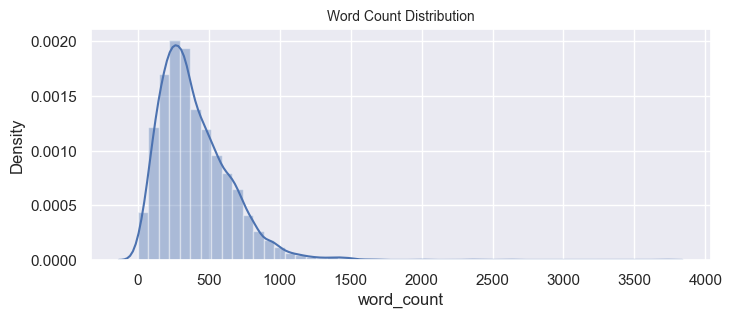

In [16]:
# obtains a word count for each individual job description 
df_desc['word_count'] = df_desc.word_tokenized.str.len()

#Plot Word Count Distribution
plt.figure(figsize = (8,3))
sns.distplot(df_desc['word_count'])
plt.title('Word Count Distribution', size = 10);

# Sentence Count

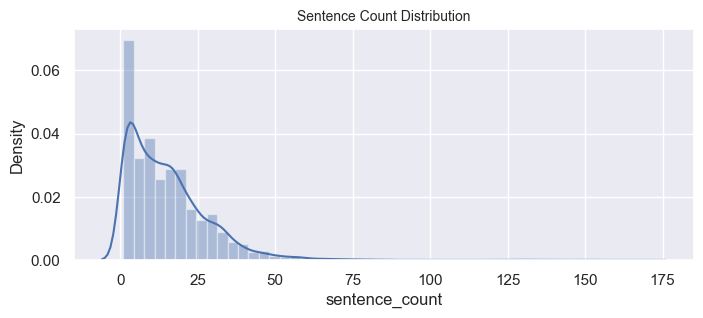

In [17]:
# obtains sentence count for each indiviual job description
df_desc['sentence_count'] = df_desc.sentence_tokenized.str.len()

#Plot sentence count destribution
plt.figure(figsize = (8,3))
sns.distplot(df_desc['sentence_count'])
plt.title('Sentence Count Distribution', size = 10);

# Descriptive Statistics

In [18]:
df_desc.describe()

,word_count,sentence_count
count,5413.000000,5413.000000
mean,400.587290,15.024386
std,249.264893,12.905971
min,0.000000,1.000000
25%,223.000000,5.000000
50%,347.000000,12.000000
75%,537.000000,21.000000
max,3704.000000,169.000000


In [19]:
# indices to be removed were examined by description of observations who's value were below 11; 
# extra indices included are redundant or had no relevant info;
extra_indices = [20, 21, 36, 155, 428, 478, 685, 900, 1008, 1009]
indices_remove =  df_desc.loc[df_desc.word_count <= 12].index 
indices_remove = list(indices_remove) + extra_indices
print(len(indices_remove), 'observations to be removed')

42 observations to be removed


In [20]:
df_desc.drop(indices_remove, inplace = True)

In [21]:
print(5413 - df_desc.shape[0], 'observations have been removed. Resulting in', df_desc.shape[0], 'observations within the dataset.')

34 observations have been removed. Resulting in 5379 observations within the dataset.


# Stop Words

In [22]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5379 entries, 0 to 5412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         5379 non-null   object
 1   lower_description   5379 non-null   object
 2   word_tokenized      5379 non-null   object
 3   sentence_tokenized  5379 non-null   object
 4   word_count          5379 non-null   int64 
 5   sentence_count      5379 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 294.2+ KB


In [23]:
df_desc.head()

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count
0,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","[position, summary, the, business, analyst, ro...","[POSITION SUMMARY, The Business Analyst role i...",424,25
1,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","[what, do, we, need, you, to, have, an, amazin...","[What do we need?, You to have an amazing pers...",286,10
2,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","[validate, analyze, and, conduct, statistical,...","[Validate, analyze, and conduct statistical an...",314,24
3,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","[full, time, washington, dc, metro, area, star...","[Full time, Washington, DC metro area, Startin...",297,13
4,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...,316,7


In [24]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in text if word not in stop_words]
    return cleaned

In [25]:
df_desc['clean_words'] = df_desc.word_tokenized.apply(stopword_removal)

# Stemming & Lemmatization

In [27]:
# stemmed and lemma words were both examined to choose which method was best suited
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [28]:
df_desc['clean_stemmed'] = df_desc.clean_words.apply(stemming)

In [29]:
df_desc['clean_lemmed'] = df_desc.clean_words.apply(lemming)

In [30]:
df_desc['clean_lemmed'].head()

0    [position, summary, business, analyst, role, p...
1    [need, amazing, personality, communication, st...
2    [validate, analyze, conduct, statistical, anal...
3    [full, time, washington, dc, metro, area, star...
4    [assist, consultation, business, partner, inte...
Name: clean_lemmed, dtype: object

In [31]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus = []
for row in df_desc.clean_lemmed:
    lem_corpus += row

In [32]:
stem_corpus = []
for row in df_desc.clean_stemmed:
    stem_corpus += row

In [33]:
len(stem_corpus), len(lem_corpus)

(1490203, 1490203)

# Frequent Words 

## (Stemmed)

In [34]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

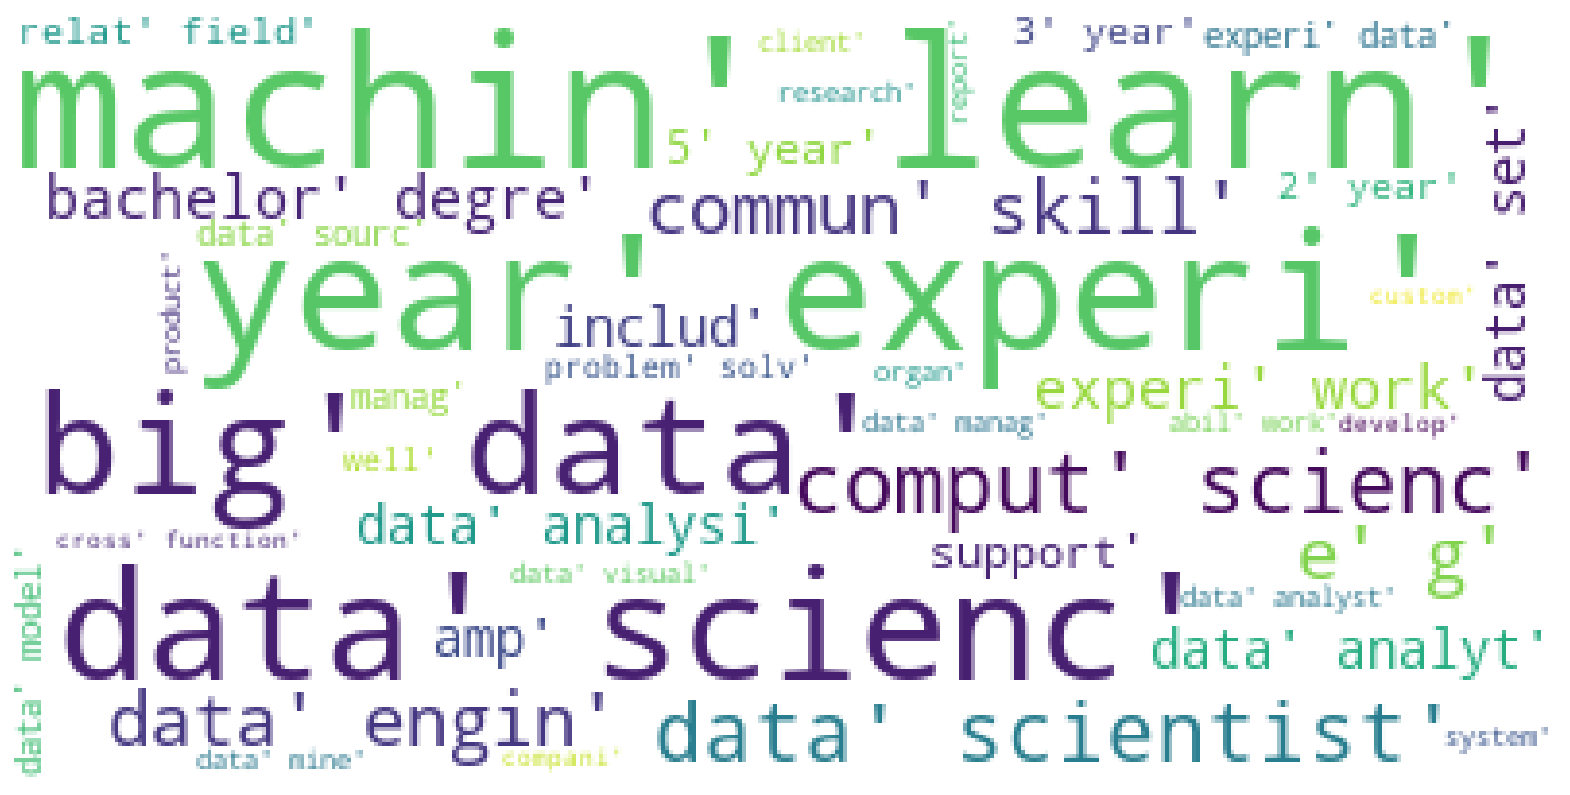

In [35]:
#Word Cloud on Stemmed Data
stem_wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          min_font_size = 6,
                          random_state=42
                         ).generate(str(stem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [36]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns=["Word", "Freq"]


In [37]:
top_stem.head()
# top_stem.tail()

,Word,Freq
0,data,53690
1,experi,28058
2,work,17209
3,develop,14530
4,busi,14217


In [38]:
top_stem.describe()

,Freq
count,14551.000000
mean,100.898220
std,737.060776
min,1.000000
25%,1.000000
50%,3.000000
75%,15.000000
max,53690.000000


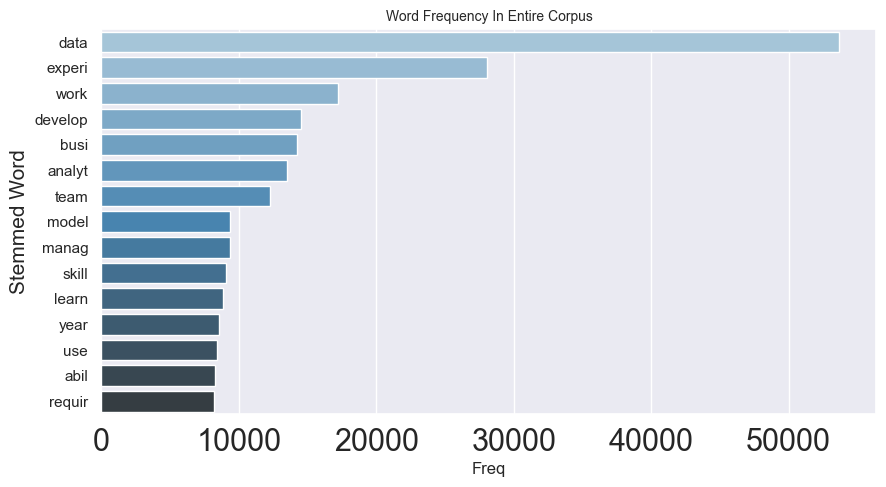

In [39]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,5)})
stem_bar = sns.barplot(y="Word", x="Freq", data=top_stem[:15], palette="Blues_d")
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Stemmed Word', size = 15)
stem_bar.set_xticklabels(stem_bar.get_xticklabels(), fontsize = 22);



## (Lemmatized)

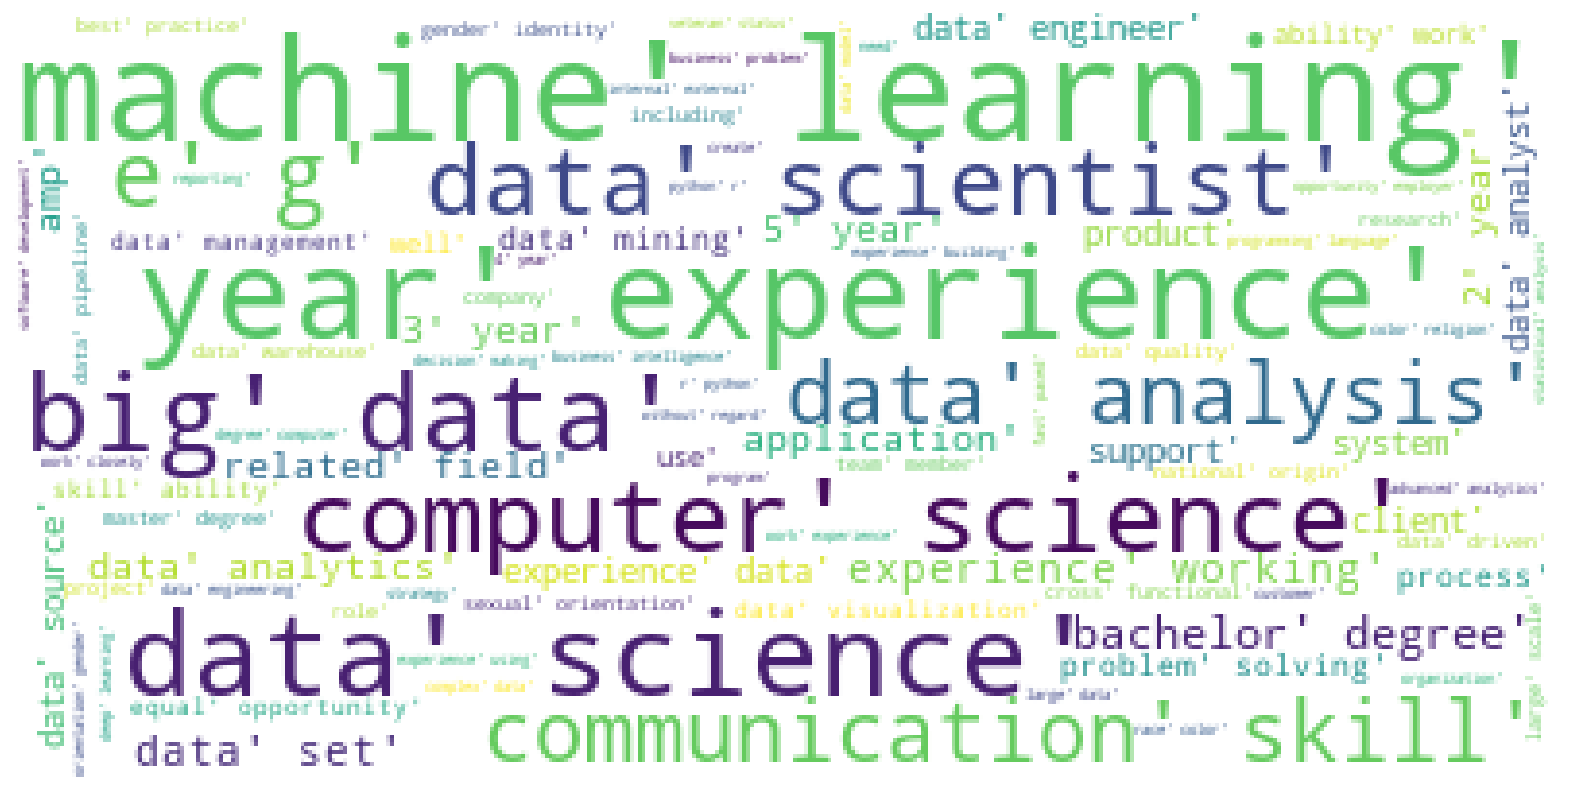

In [40]:
#Word Cloud on Lemmatized Words
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(lem_corpus))

fig = plt.figure(1, figsize = (20,15))
plt.imshow(wordcloud)
plt.axis('off');
# wordcloud.to_file('lemma_wordcloud.png');


In [41]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(lem_corpus)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

In [42]:
top_df.head(5)

,Word,Freq
0,data,53690
1,experience,27489
2,business,14210
3,team,12285
4,work,11589


In [43]:
top_df.describe()

,Freq
count,18829.000000
mean,77.733231
std,595.373167
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,53690.000000


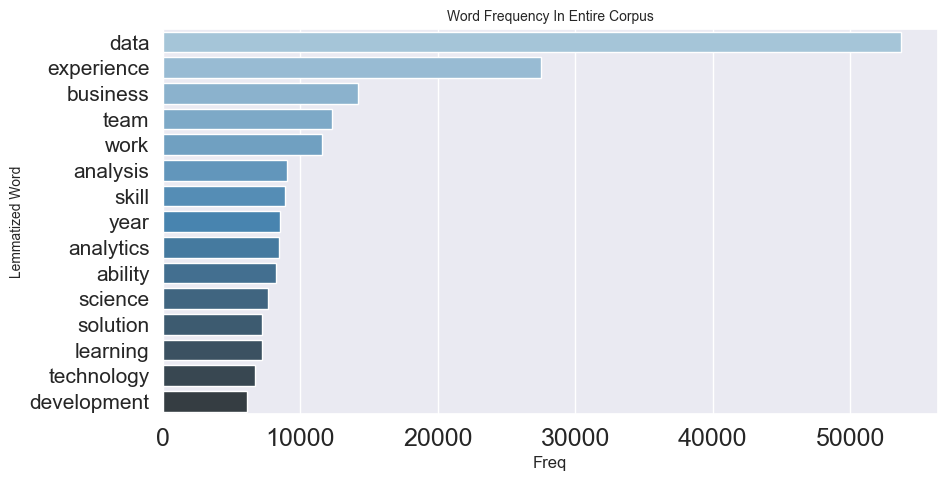

In [44]:
#Barplot of most freq words
lem_bar = sns.barplot(y = "Word", x = "Freq", data = top_df[:15], palette = "Blues_d", orient = 'h')
lem_bar.set_yticklabels(lem_bar.get_yticklabels(), fontsize = 15);
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Lemmatized Word', size = 10)
plt.xticks(size = 18)
plt.savefig('freqWords_bar.png', dpi=400)

# N-grams

## Bigrams

In [45]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [46]:
# corpus with stopwords removed and list joined for n-gram distinction
ngram_corpus = df_desc.clean_words.str.join(' ')
ngram_corpus

0       position summary business analyst role primary...
1       need amazing personality communication style s...
2       validate analyze conduct statistical analysis ...
3       full time washington dc metro area starting sa...
4       assist consultations business partners interna...
                              ...                        
5408    data software engineer focus developing tools ...
5409    want change world contribute life changing har...
5410    identify solve hybrid cloud data engineering s...
5411    capital one building leading information based...
5412    develops parallel data intensive systems using...
Name: clean_words, Length: 5379, dtype: object

In [47]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

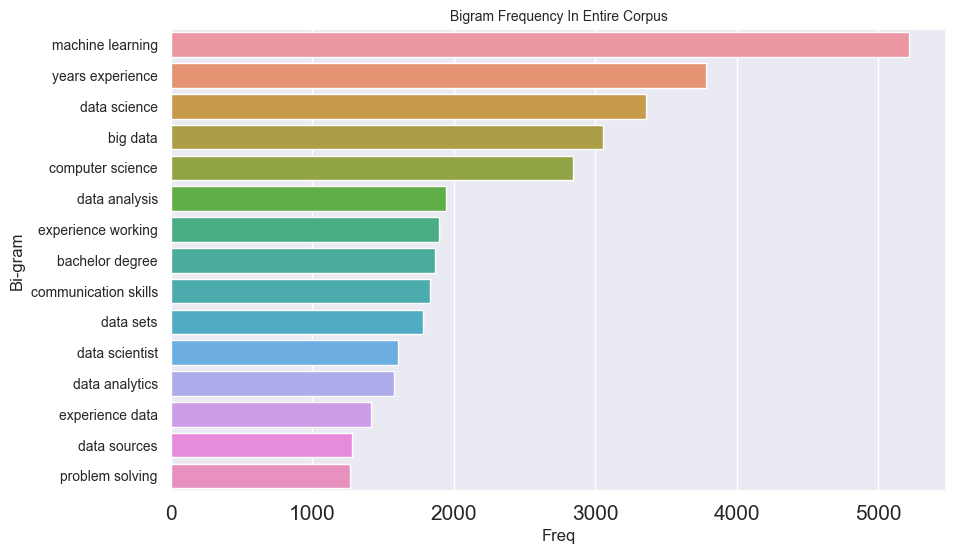

In [48]:
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(10,6)})
bbar = sns.barplot(y ="Bi-gram", x ="Freq", orient = 'h', data = top2_df[:15])
plt.title('Bigram Frequency In Entire Corpus', size=10)
plt.xticks(size = 15)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 10);
plt.savefig('bigram_bar.png', dpi=200)

## Trigrams

In [49]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [50]:
top3_words = get_top_n3_words(ngram_corpus, n = len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]


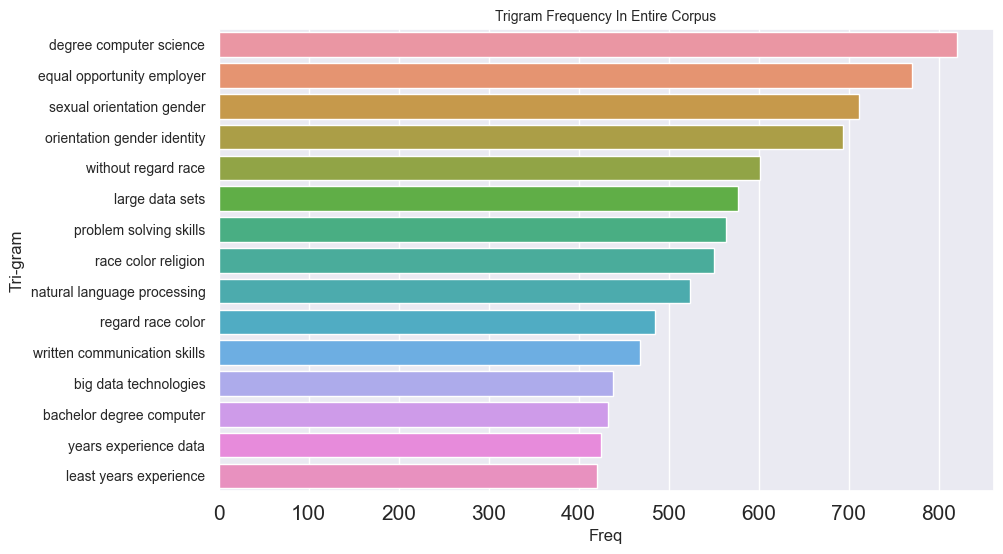

In [51]:
#Barplot of most freq Tri-grams
plt.tight_layout()
sns.set(rc={'figure.figsize':(10,6)})
tbar = sns.barplot(y = "Tri-gram", x = "Freq", orient = 'h', data = top3_df[:15])
plt.title('Trigram Frequency In Entire Corpus', size=10)
plt.xticks(size = 15)
tbar.set_yticklabels(tbar.get_yticklabels(), fontsize = 10);
plt.savefig('trigram_bar.png', dpi=200)

# Saving Dataset 


In [52]:
df_desc.to_csv('data\collected_data\df_description_processed.csv', index = False)

In [53]:
test1=pd.read_csv('data\collected_data\df_description_processed.csv')

In [54]:
test1.head(5)

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_stemmed,clean_lemmed
0,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","['position', 'summary', 'the', 'business', 'an...","['POSITION SUMMARY, The Business Analyst role ...",424,25,"['position', 'summary', 'business', 'analyst',...","['posit', 'summari', 'busi', 'analyst', 'role'...","['position', 'summary', 'business', 'analyst',..."
1,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","['what', 'do', 'we', 'need', 'you', 'to', 'hav...","['What do we need?, You to have an amazing per...",286,10,"['need', 'amazing', 'personality', 'communicat...","['need', 'amaz', 'person', 'commun', 'style', ...","['need', 'amazing', 'personality', 'communicat..."
2,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","['validate', 'analyze', 'and', 'conduct', 'sta...","['Validate, analyze, and conduct statistical a...",314,24,"['validate', 'analyze', 'conduct', 'statistica...","['valid', 'analyz', 'conduct', 'statist', 'ana...","['validate', 'analyze', 'conduct', 'statistica..."
3,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","['full', 'time', 'washington', 'dc', 'metro', ...","['Full time, Washington, DC metro area, Starti...",297,13,"['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ..."
4,Assist in consultations with business partners...,assist in consultations with business partners...,"['assist', 'in', 'consultations', 'with', 'bus...",['Assist in consultations with business partne...,316,7,"['assist', 'consultations', 'business', 'partn...","['assist', 'consult', 'busi', 'partner', 'inte...","['assist', 'consultation', 'business', 'partne..."
